# Import Statements

In [3]:
!pip install keras
!pip install pillow
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn


     ---------------------------------------- 0.0/48.6 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.6 kB ? eta -:--:--
     ---------------- --------------------- 20.5/48.6 kB 131.3 kB/s eta 0:00:01
     -------------------------------------- 48.6/48.6 kB 306.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 2.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 3.8 MB/s eta 0:00:01
   --------------------------- ------------ 0.9/1.3 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   --------------------- ------------------ 71.7/133.7 kB ? eta -:--:--
   --------------------- ------------------ 71.7/133.7 kB ? eta -:--:--
   ----------------------------

In [5]:
!pip install tensorflow


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB 1.3 MB/s eta 0:05:05
   ---------------------------------------- 0.1/390.3 MB 1.3 MB/s eta 0:04:56
   ---------------------------------------- 0.2/390.3 MB 1.7 MB/s eta 0:03:47
   ---------------------------------------- 0.5/390.3 MB 3.0 MB/s eta 0:02:12
   ---------------------------------------- 1.0/390.3 MB 4.6 MB/s eta 0:01:25
   ---------------------------------------- 2.0/390.3 MB 7.5 MB/s eta 0:00:52
   ---------------------------------------- 3.1/390.3 MB 10.0 MB/s eta 0:00:39
    --------------------------------------- 5.0/390.3 MB 14.0 MB/s eta 0:00:28
    --------------------------------------- 7.6/390.3 MB 18.6 MB/s eta 0:00:21
   - -------------------------------------- 10.1/390.3 MB 22.2 MB/s eta 0:00:18
   - -------------------------------------- 12.7/390.3 MB 50.4 MB/s eta 0:00:08
   - -------------------------------------- 15.3/390.3 MB 54.4 M

In [6]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# One Hot Encoding the Target Classes

In [7]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Creating 3 Important Lists --
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [14]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'C:/Users/tejas/Desktop/Brain tumor/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [15]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r'C:/Users/tejas/Desktop/Brain tumor/brain_tumor_dataset/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [16]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [17]:
result = np.array(result)
result = result.reshape(139,2)

# Splitting the Data into Training & Testing

In [18]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [19]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

C:\Users\tejas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [20]:
y_train.shape

(111, 2)

In [21]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 984ms/step - loss: 24.4601 - val_loss: 44.1642
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 887ms/step - loss: 24.0890 - val_loss: 11.1120
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 859ms/step - loss: 8.0669 - val_loss: 58.7500
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 784ms/step - loss: 12.1166 - val_loss: 8.5795
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 779ms/step - loss: 2.2956 - val_loss: 13.2783
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 805ms/step - loss: 1.6035 - val_loss: 17.1568
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 839ms/step - loss: 2.2620 - val_loss: 14.1386
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 833ms/step - loss: 0.3770 - val_loss: 11.1937
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 805ms/step - loss: 0.2718 - val_loss: 9.0084
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 922ms/step - loss: 0.1953 - val_loss: 7.4566
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 907ms/step - loss: 0.2373 - val_loss: 6.2018
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 855ms/step - loss: 0.042

# Plotting Losses

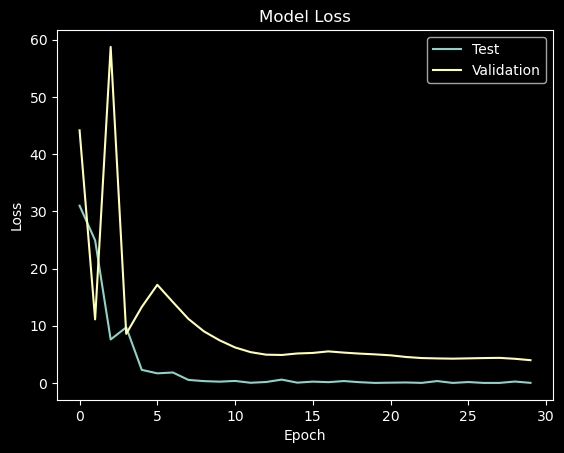

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Just Checking the Model

In [23]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence ,So it Is Its a Tumor


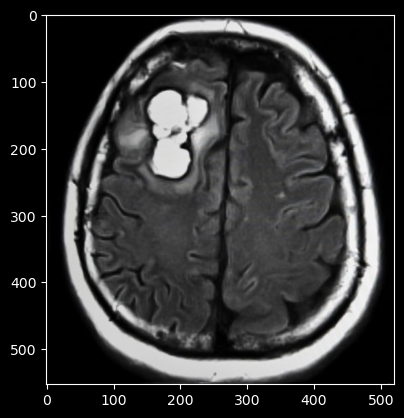

In [25]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:/Users/tejas/Downloads/brain-tumor-x-ray.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ,So it Is ' + names(classification))

94.29% Confidence, So it is a Class 1


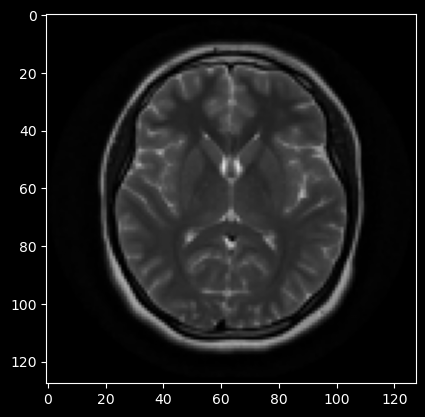

In [32]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

# Assuming 'model' is already defined
# 'names' should be a list of class names, for example:
names = ['Class 1', 'Class 2', 'Class 3']  # Replace with your actual class names

# Load and preprocess the image
img = Image.open(r"C:/Users/tejas/Downloads/bd937738ad6223a03f8aedcf4920a7_big_gallery.jpeg")
img = img.resize((128, 128))  # Resize to 128x128
img = np.array(img)  # Convert image to numpy array

# Ensure image has 3 channels (RGB)
if img.ndim == 2:  # If grayscale, convert to RGB
    img = np.stack([img] * 3, axis=-1)

# Normalize the image (if your model expects normalized values)
img = img / 255.0  # Scale pixel values to [0, 1]

# Reshape to (1, 128, 128, 3) for the model input
x = img.reshape(1, 128, 128, 3)

# Get the model's prediction
res = model.predict_on_batch(x)

# Find the class with the maximum probability
classification = np.argmax(res)  # Find index of max probability
confidence = res[0][classification] * 100  # Confidence in percentage

# Show the image and print the prediction result
imshow(img)
print(f"{confidence:.2f}% Confidence, So it is a {names[classification]}")


# Thats It !!